In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

In [3]:
# Load the dataset

df = pd.read_csv("Product_Sales.csv")

In [5]:
# Explore the dataset

# Display the first few rows of the dataset
print(df.head())

# Summary statistics and data types
print(df.info())
print(df.describe())

# Check for null values
print(df.isnull().sum())

   AgentID  CallID  CustomerID  PickedUp  Duration  ProductSold  \
0        0    7999         519         1       117            0   
1        0    7100         469         1       235            0   
2        0    3752          74         1       185            0   
3        0    3751         562         1       121            0   
4        0    6783          30         1       102            1   

         Agent_Name  
0  Michele Williams  
1  Michele Williams  
2  Michele Williams  
3  Michele Williams  
4  Michele Williams  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9939 entries, 0 to 9938
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgentID      9939 non-null   int64 
 1   CallID       9939 non-null   int64 
 2   CustomerID   9939 non-null   int64 
 3   PickedUp     9939 non-null   int64 
 4   Duration     9939 non-null   int64 
 5   ProductSold  9939 non-null   int64 
 6   Agent_Name   9939 non-null

In [7]:
# Check for and remove duplicates

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [19]:
# Validate data types

# Check data type first
print(df.dtypes)

AgentID         int64
CallID          int64
CustomerID      int64
PickedUp        int64
Duration        int64
ProductSold     int64
Agent_Name     object
dtype: object


In [23]:
# Convert 'Pickup' to boolean. 'PickedUp' indicates if the customer picked up the call or not. It's in numberic format
df['PickedUp'] = df['PickedUp'].astype(bool)

# Change values in 'Pickup' column: 1 -> 'Yes', 0 -> 'No'
df['PickedUp'] = df['PickedUp'].replace({1: 'Yes', 0: 'No'})

# Verify the changes
print(df.dtypes)

AgentID         int64
CallID          int64
CustomerID      int64
PickedUp         bool
Duration        int64
ProductSold     int64
Agent_Name     object
dtype: object


In [25]:
# Display the first few rows of the dataset to confirm the 'PickedUp' column data type and values were changed
print(df.head())

   AgentID  CallID  CustomerID  PickedUp  Duration  ProductSold  \
0        0    7999         519      True       117            0   
1        0    7100         469      True       235            0   
2        0    3752          74      True       185            0   
3        0    3751         562      True       121            0   
4        0    6783          30      True       102            1   

         Agent_Name  
0  Michele Williams  
1  Michele Williams  
2  Michele Williams  
3  Michele Williams  
4  Michele Williams  


In [27]:
# Standardize column names

# Rename the only column that isn't standardized
df.rename(columns={
    'Agent_Name': 'AgentName'
}, inplace=True)

# Display updated column names
print(df.columns)

Index(['AgentID', 'CallID', 'CustomerID', 'PickedUp', 'Duration',
       'ProductSold', 'AgentName'],
      dtype='object')


In [31]:
# Validate data integrity

# Check for negative values in 'Duration' and 'ProductsSold'
print(df[df['Duration'] < 0])
print(df[df['ProductSold'] < 0])

      AgentID  CallID  CustomerID  PickedUp  Duration  ProductSold  \
4365        3    4670         480      True        -3            0   
6038        5    4918         707      True        -5            0   

        AgentName  
4365  Todd Morrow  
6038   Paul Nunez  
Empty DataFrame
Columns: [AgentID, CallID, CustomerID, PickedUp, Duration, ProductSold, AgentName]
Index: []


In [33]:
# Negative durations don't make logical sense, so to ensure data consistency, replace negative values with appropriate replacements (positive values)
df['Duration'] = df['Duration'].apply(lambda x: abs(x))

# NB: The abs(x) function returns the absolute value of x. If 'x = -10', abs(x) returns 10.

In [41]:
# Confirm that this change was effected in the 'Duration' column
print(df[df['Duration'] < 0])

Empty DataFrame
Columns: [AgentID, CallID, CustomerID, PickedUp, Duration, ProductSold, AgentName, AvgDurationPerProduct, SuccessfulSale]
Index: []


In [43]:
# Metric for average duration per product

# Calculate average duration per product sold (avoid division by zero). 
df['AvgDurationPerProduct'] = df['Duration'] / df['ProductSold']

# Replaces invalid or undefined values in the AvgDurationPerProduct column with 0.
df['AvgDurationPerProduct'] = df['AvgDurationPerProduct'].replace([np.inf, np.nan], 0)

# This metric provides insights into how much time, on average, agents spend to sell one product.

# Add a flag for successful sales
df['SuccessfulSale'] = df['ProductSold'] > 0

In [45]:
# Display the first few rows of the dataset to see if the average product sold is there
print(df.head())

   AgentID  CallID  CustomerID  PickedUp  Duration  ProductSold  \
0        0    7999         519      True       117            0   
1        0    7100         469      True       235            0   
2        0    3752          74      True       185            0   
3        0    3751         562      True       121            0   
4        0    6783          30      True       102            1   

          AgentName  AvgDurationPerProduct  SuccessfulSale  
0  Michele Williams                    0.0           False  
1  Michele Williams                    0.0           False  
2  Michele Williams                    0.0           False  
3  Michele Williams                    0.0           False  
4  Michele Williams                  102.0            True  


In [65]:
# Metrics: Total products sold, average duration per call, total calls handled, and success rate (pickup ratio)

# Group data by agents and calculate performance metrics
agent_performance = df.groupby('AgentName').agg(
    TotalCalls=('CallID', 'count'),
    ProductsSold=('ProductSold', 'sum'),
    TotalDuration=('Duration', 'sum'),
    SuccessRate=('PickedUp', lambda x: x.mean() * 100)  # Percentage of calls picked up
).reset_index()

# Add average duration per call
agent_performance['AvgDurationPerCall'] = agent_performance['TotalDuration'] / agent_performance['TotalCalls']

# Sort by products sold for better visualization
agent_performance.sort_values(by='ProductsSold', ascending=False, inplace=True)

print(agent_performance)

             AgentName  TotalCalls  ProductsSold  TotalDuration  SuccessRate  \
4         Gloria Singh         926           209         120600    71.490281   
10         Todd Morrow         912           204         114035    69.188596   
6         Lisa Cordova         919           201         114518    69.532100   
7     Michele Williams         976           198         121848    70.184426   
0              Agent X         921           194         115824    69.489685   
8           Paul Nunez         920           194         117344    70.434783   
2   Christopher Moreno         910           189         115509    71.318681   
5       Jocelyn Parker         844           184         111983    73.578199   
3           Dana Hardy         847           182          98171    65.407320   
9          Randy Moore         883           177         107157    67.950170   
1         Angel Briggs         881           157         107019    67.082860   

    AvgDurationPerCall  
4           13

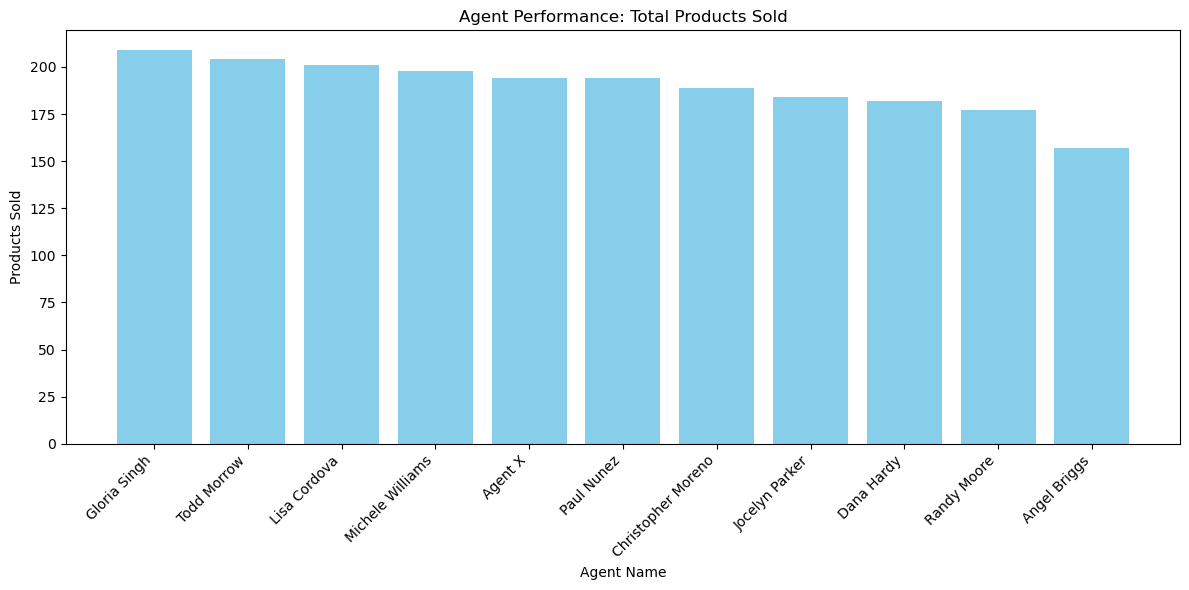

In [61]:
# Visualize metric

import matplotlib.pyplot as plt

# Bar chart for agent performance
plt.figure(figsize=(12, 6))
plt.bar(agent_performance['AgentName'], agent_performance['ProductsSold'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Agent Performance: Total Products Sold')
plt.xlabel('Agent Name')
plt.ylabel('Products Sold')
plt.tight_layout()
plt.show()

In [63]:
# Metrics: Call duration distribution, average products purchased, and pickup behavior.

# Analyze customer pickup behavior
customer_behavior = df.groupby('CustomerID').agg(
    TotalCalls=('CallID', 'count'),
    TotalPickup=('PickedUp', 'sum'),
    AvgProducts=('ProductSold', 'mean'),
    AvgDuration=('Duration', 'mean')
).reset_index()

# Add Pickup Rate
customer_behavior['PickupRate'] = (customer_behavior['TotalPickup'] / customer_behavior['TotalCalls']) * 100

print(customer_behavior.head())

   CustomerID  TotalCalls  TotalPickup  AvgProducts  AvgDuration  PickupRate
0           0          12            6     0.166667   107.750000   50.000000
1           1           9            6     0.333333   115.888889   66.666667
2           2          12            9     0.250000   139.416667   75.000000
3           3          11            6     0.090909   108.454545   54.545455
4           4           7            5     0.142857   122.857143   71.428571


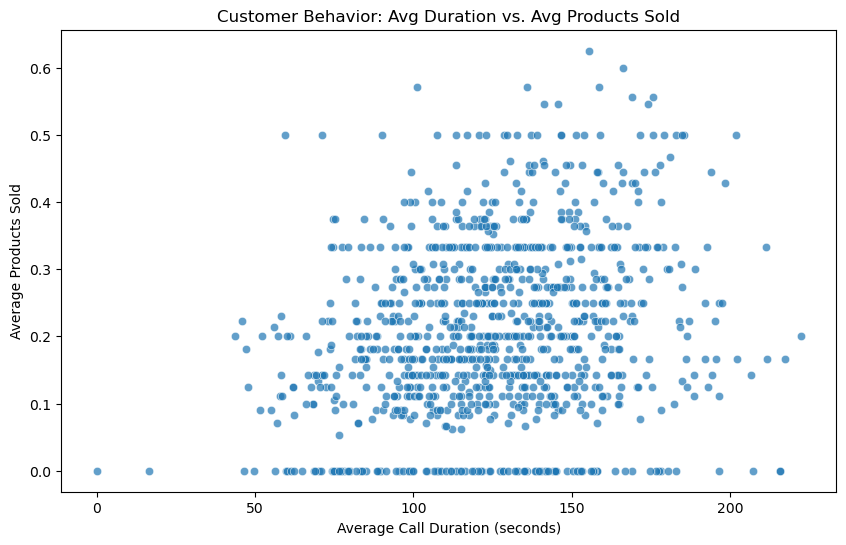

In [55]:
# Visualize customer behaviour analysis metric

import seaborn as sns

# Scatterplot for average products sold vs. average call duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AvgDuration', y='AvgProducts', data=customer_behavior, alpha=0.7)
plt.title('Customer Behavior: Avg Duration vs. Avg Products Sold')
plt.xlabel('Average Call Duration (seconds)')
plt.ylabel('Average Products Sold')
plt.show()

In [69]:
# Metric: The percentage of successful calls (picked up)

# Calculate call success rate
success_rate = df['PickedUp'].mean() * 100
print(f"Call Success Rate: {success_rate:.2f}%")

Call Success Rate: 69.62%


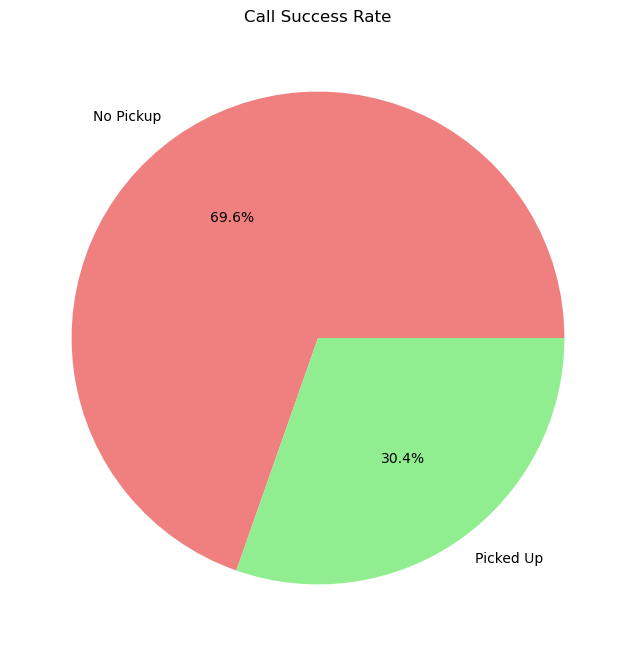

In [71]:
# Visualize call success rate metric

# Pie chart for call success vs failure
call_status = df['PickedUp'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(call_status, labels=['No Pickup', 'Picked Up'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Call Success Rate')
plt.show()

In [73]:
# Metric: Correlation between call duration and sales

# To analyze whether longer call durations result in higher product sales

correlation = df['Duration'].corr(df['ProductSold'])
print(f"Correlation between Duration and Products Sold: {correlation:.2f}")

Correlation between Duration and Products Sold: 0.31


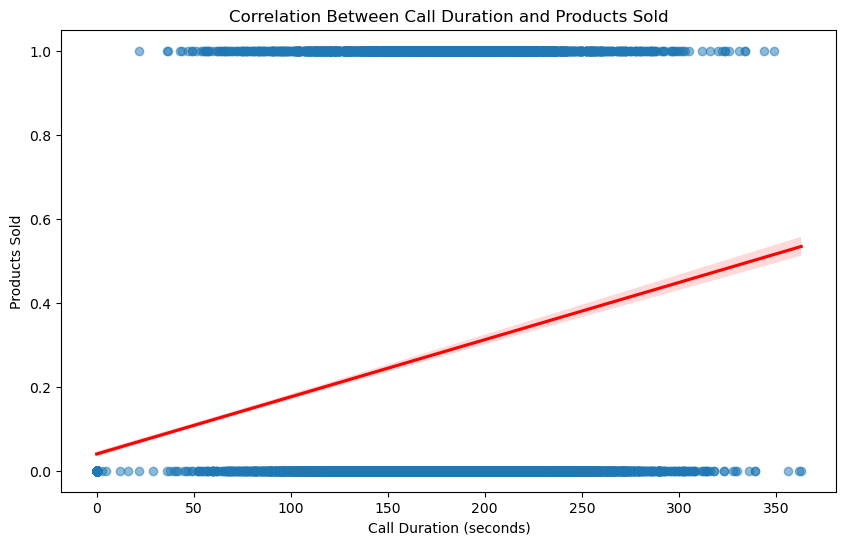

In [75]:
# Visualize correlation between call duration and products sold metric

# Scatterplot for call duration vs. products sold
plt.figure(figsize=(10, 6))
sns.regplot(x='Duration', y='ProductSold', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Call Duration and Products Sold')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Products Sold')
plt.show()

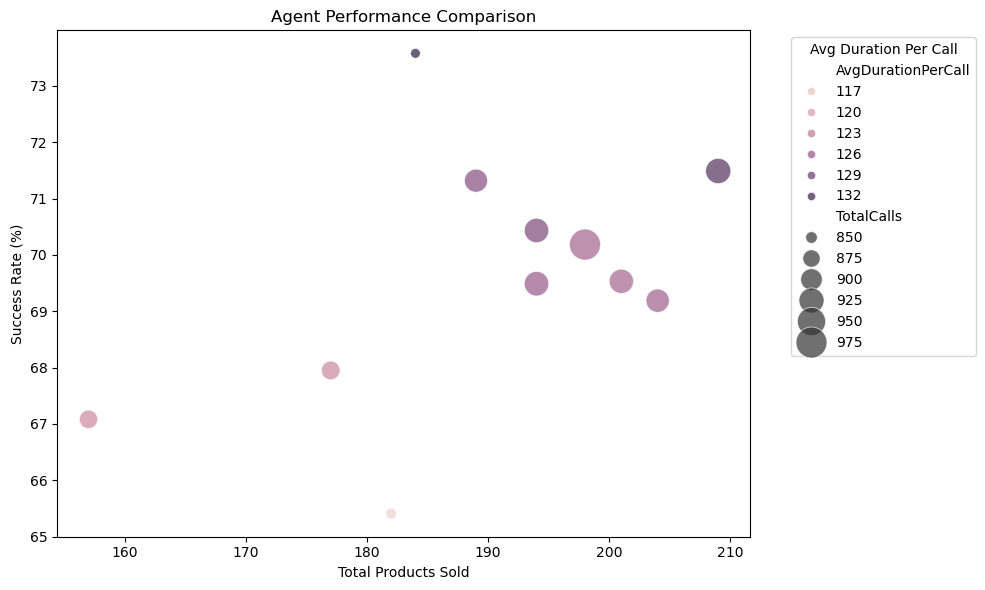

In [77]:
# Metric: Agent comparison (Performance matrix)

# Comparing agents based on ProductsSold and SuccessRate.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ProductsSold', 
    y='SuccessRate', 
    data=agent_performance, 
    size='TotalCalls', 
    hue='AvgDurationPerCall', 
    sizes=(50, 500), 
    alpha=0.7
)
plt.title('Agent Performance Comparison')
plt.xlabel('Total Products Sold')
plt.ylabel('Success Rate (%)')
plt.legend(title='Avg Duration Per Call', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [79]:
# Save the cleaned dataset to a new file
df.to_csv("cleaned_sales_data.csv", index=False)

print("Cleaned dataset saved as 'cleaned_sales_data.csv'")

Cleaned dataset saved as 'cleaned_sales_data.csv'
